In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('report/EXP_benchmark_flash_NEW.csv')
df = df.sort_values(by=['prefill','input'])
df

In [29]:
# Preparing data for plotting
x_list_prefill = df['prefill'].unique().tolist()
# x_list_input = df['input'].unique().tolist()
x_list_input = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]

# With Flash-Attn (varying 'input')
y_lists_flash = [df[df['input'] == input_value]['latency'].tolist() for input_value in x_list_input]

# With Flash-Attn (varying 'prefill')
y_lists_prefill_flash = [df[df['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]


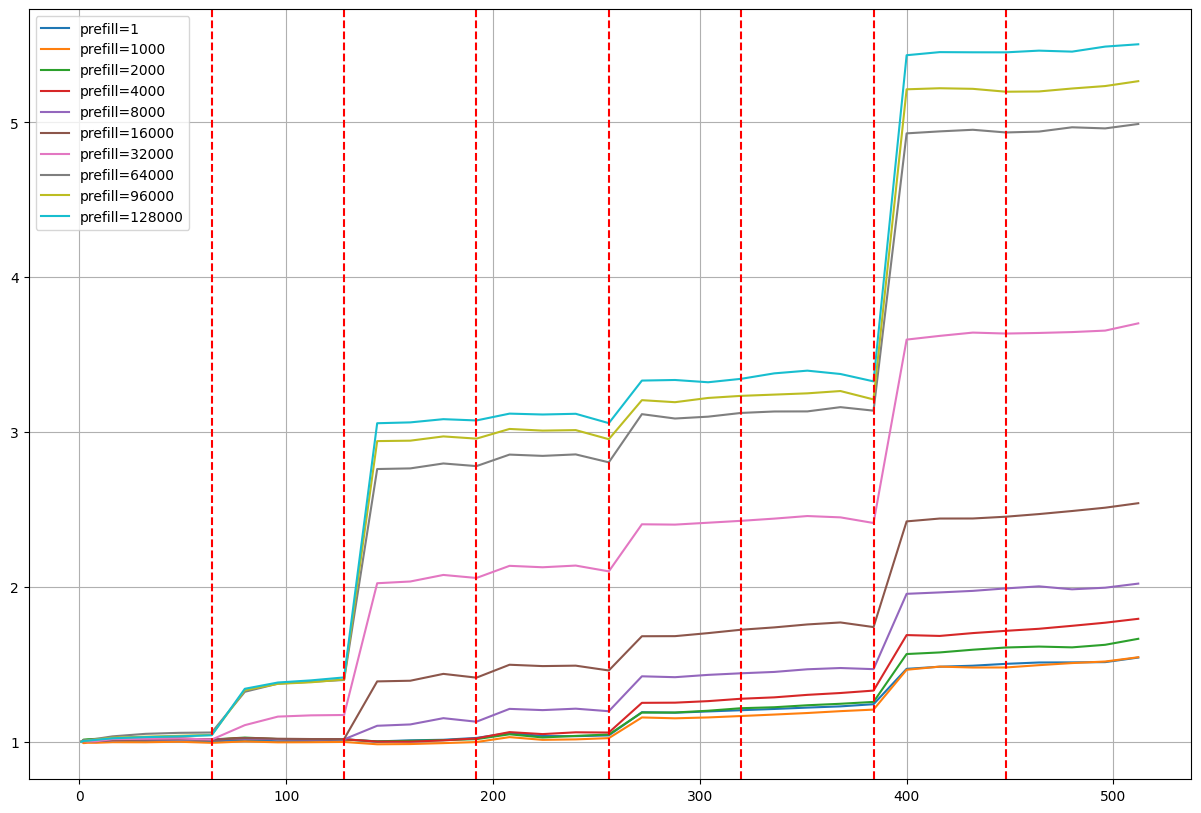

In [37]:
plt.figure(figsize=(15,10))
plt.grid()
prefill = x_list_prefill
x = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]
k=0
for i in y_lists_prefill_flash:
    plt.plot(x,[m / i[0] for m in i], label=f'prefill={prefill[k]}')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

# plt.ylim(1)
# draw a vertical line at x = 128
plt.axvline(x=64, color='r', linestyle='--')
plt.axvline(x=128, color='r', linestyle='--')
plt.axvline(x=192, color='r', linestyle='--')
plt.axvline(x=256, color='r', linestyle='--')
plt.axvline(x=320, color='r', linestyle='--')
plt.axvline(x=384, color='r', linestyle='--')
plt.axvline(x=448, color='r', linestyle='--')
plt.legend()


In [41]:
kk=0
for i in y_lists_prefill_flash:
    k = [m / i[0] for m in i]
    for j in range(len(k)):
        if k[j] > 1.25:
            print(prefill[kk], x[j])
            break
    kk+=1

1 400
1000 400
2000 384
4000 272
8000 272
16000 144
32000 144
64000 80
96000 80
128000 80


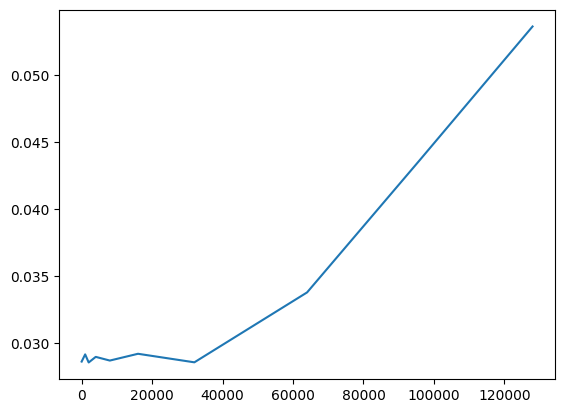

In [49]:
plt.plot(prefill,y_lists_flash[0])

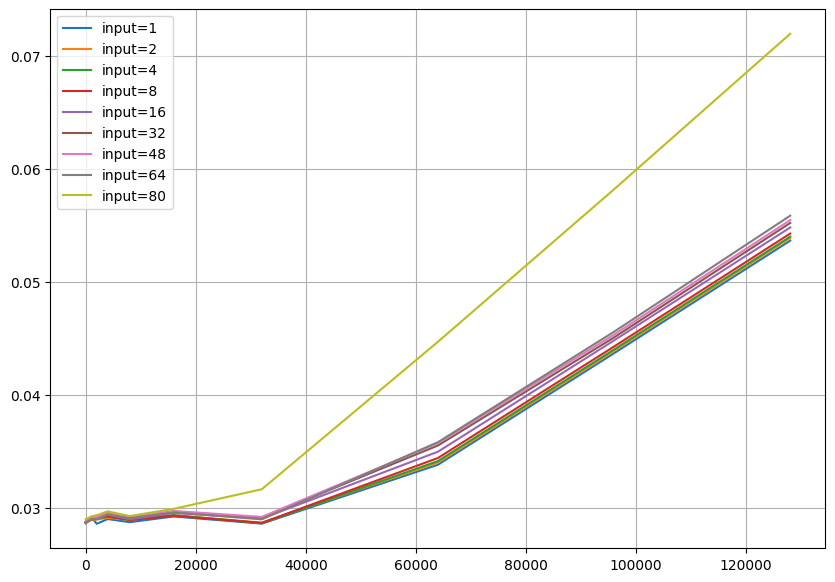

In [71]:
plt.figure(figsize=(10,7))
plt.grid()
prefill = x_list_prefill
x = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]
k=0
for i in y_lists_flash[:9]:
    plt.plot(prefill,i, label=f'input={x[k]}')
    k+=1
plt.legend()

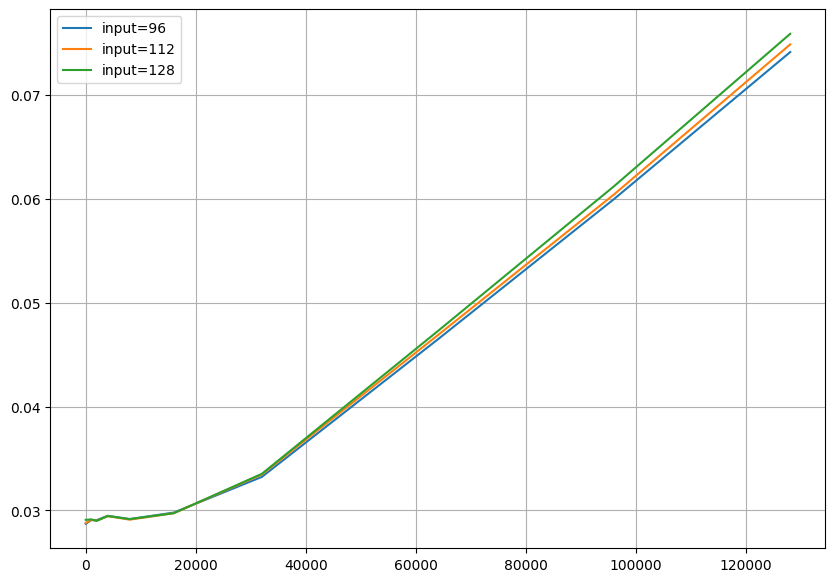

In [72]:
plt.figure(figsize=(10,7))
plt.grid()
for i in y_lists_flash[9:12]:
    plt.plot(prefill,i, label=f'input={x[k]}')
    k+=1
plt.legend()

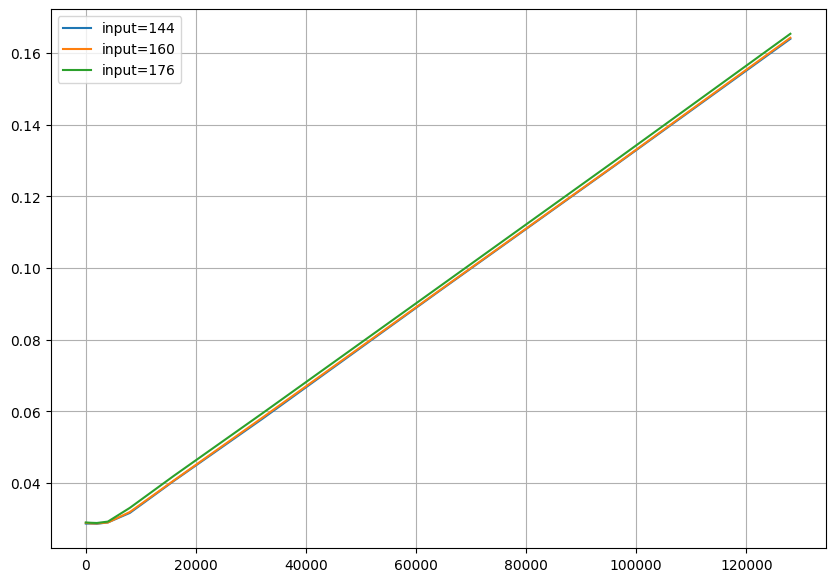

In [73]:
plt.figure(figsize=(10,7))
plt.grid()
for i in y_lists_flash[12:15]:
    plt.plot(prefill,i, label=f'input={x[k]}')
    k+=1
plt.legend()

In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('report/EXP_benchmark_flash_streamllm.csv')
df = df.sort_values(by=['prefill','input'])
df

,prefill,input,latency,update_time,ssl,repeat_time
0,1,1,0.025369,0.001176,1,2000
306,1,1,0.024905,0.001184,-1,2000
612,1,1,0.024810,0.001180,0,2000
3,1,2,0.025447,0.001176,1,2000
307,1,2,0.025168,0.001184,-1,2000
...,...,...,...,...,...,...
609,48000,120,0.031724,0.008289,-1,2000
304,48000,124,0.033754,0.008291,1,2000
610,48000,124,0.031791,0.008289,-1,2000
305,48000,128,0.033962,0.008291,1,2000


In [22]:
# Preparing data for plotting
x_list_prefill = df['prefill'].unique().tolist()
# x_list_input = df['input'].unique().tolist()
x_list_input = [1,2,4,8,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480,496,512]

# With Flash-Attn (varying 'input')
y_lists_flash = [df[df['input'] == input_value]['latency'].tolist() for input_value in x_list_input]

df_skip2 = df[df['ssl'] == 1]
y_lists_prefill_flash_skip2 = [df_skip2[df_skip2['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]
y_lists_prefill_update_skip2 = [df_skip2[df_skip2['prefill'] == prefill]['update_time'].tolist() for prefill in x_list_prefill]

df_nonskip = df[df['ssl'] == -1]
y_lists_prefill_flash_nonskip = [df_nonskip[df_nonskip['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]
y_lists_prefill_update_nonskip = [df_nonskip[df_nonskip['prefill'] == prefill]['update_time'].tolist() for prefill in x_list_prefill]

In [23]:
len(y_lists_prefill_flash_skip2[0])

34

In [24]:
x_list_prefill

[1, 1000, 2000, 3000, 4000, 8000, 16000, 32000, 48000]

Text(0.5, 1.0, 'Non-skip (update cache time)')

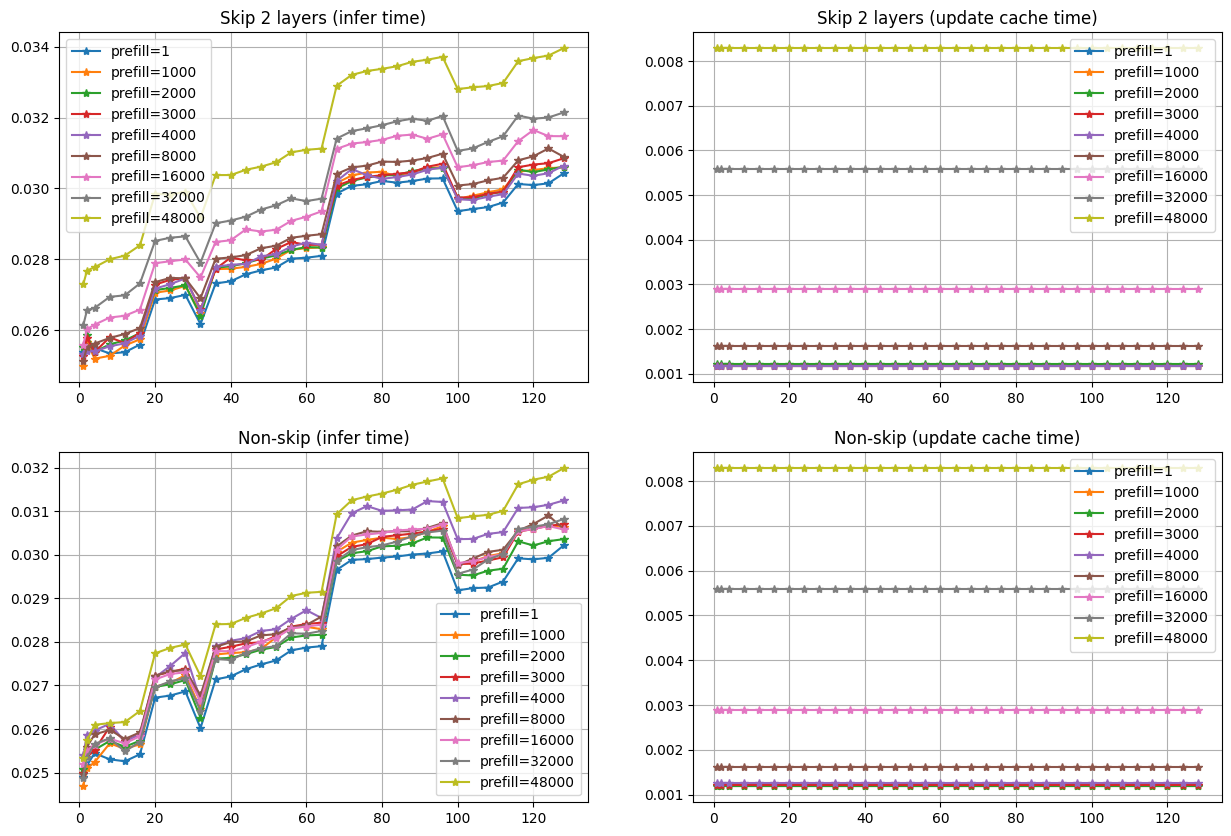

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
prefill = [1, 1000, 2000, 3000, 4000, 8000, 16000, 32000, 48000]
x =  [1,2,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120,124,128]
k=0
for i in y_lists_prefill_flash_skip2:
    axs[0, 0].plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 0].set_title('Skip 2 layers (infer time)')


k=0
for i in y_lists_prefill_update_skip2:
    axs[0, 1].plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

axs[0, 1].legend()
axs[0, 1].grid()
axs[0, 1].set_title('Skip 2 layers (update cache time)')

k=0
for i in y_lists_prefill_flash_nonskip:
    axs[1, 0].plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 0].set_title('Non-skip (infer time)')

k=0
for i in y_lists_prefill_update_nonskip:
    axs[1, 1].plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_title('Non-skip (update cache time)')

Text(0.5, 1.0, 'Draft model Latency')

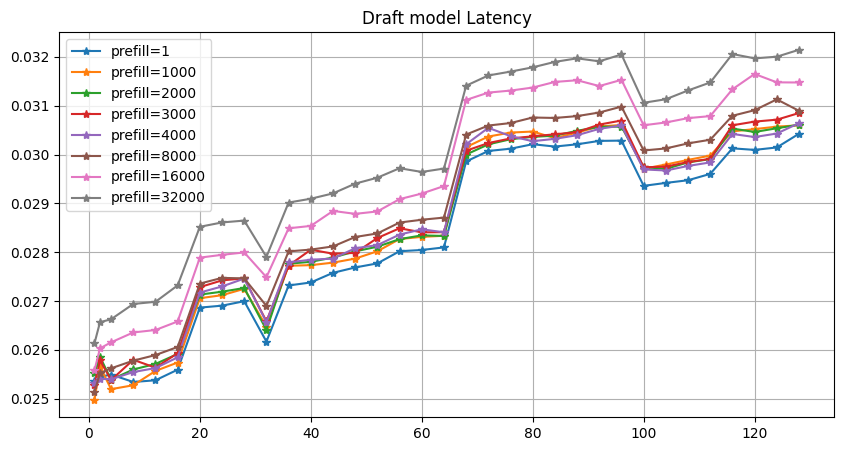

In [24]:
plt.figure(figsize=(10,5))
plt.grid()
prefill = [1, 1000, 2000, 3000, 4000, 8000, 16000, 32000]
x =  [1,2,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120,124,128]
k=0
for i in y_lists_prefill_flash:
    plt.plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

plt.legend()
plt.title('Draft model Latency')


Text(0.5, 1.0, 'Draft model Latency (Update cache)')

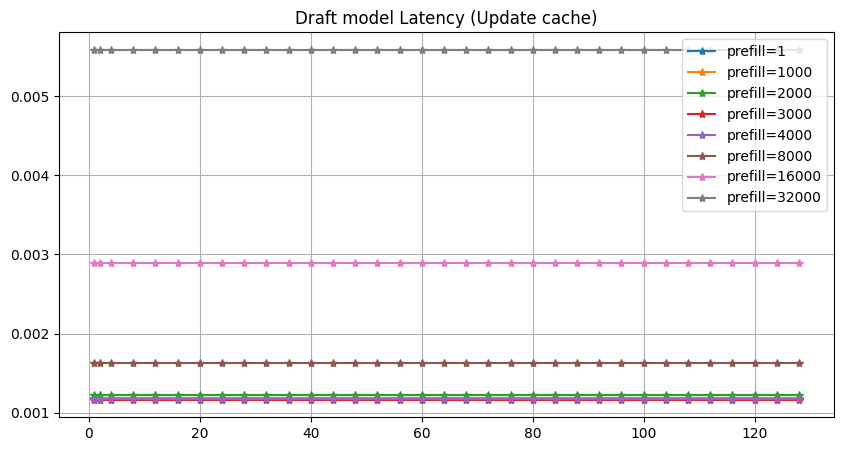

In [25]:
plt.figure(figsize=(10,5))
plt.grid()
prefill = [1, 1000, 2000, 3000, 4000, 8000, 16000, 32000]
x =  [1,2,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120,124,128]
k=0
for i in y_lists_prefill_update:
    plt.plot(x,i, label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

plt.legend()
plt.title('Draft model Latency (Update cache)')


In [1]:
from flash_attn.flash_attn_interface import flash_attn_with_kvcache
import torch
from torch.profiler import profile, ProfilerActivity
from models.cache_utils import FlashSimpleCache
# from transformers import LlamaForCausalLM
from models.modeling_llama_flash import LlamaForCausalLM

model = LlamaForCausalLM.from_pretrained("NousResearch/Yarn-Llama-2-7b-128k", torch_dtype=torch.float16, device_map='cuda:0')

cache = FlashSimpleCache(model, max_budget=1024)

>>>> Flash Attention installed
>>>> Flash RoPE installed


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
q = torch.randn((1, 1, 32, 128),device='cuda:0', dtype=torch.float16)
k = torch.randn((1, 1, 32, 128),device='cuda:0', dtype=torch.float16)
v = torch.randn((1, 1, 32, 128),device='cuda:0', dtype=torch.float16)

with profile(activities=[ProfilerActivity.CPU,ProfilerActivity.CUDA], record_shapes=True, with_stack=True) as prof:
    attn_outputs = flash_attn_with_kvcache(q, k, v, softmax_scale=1.0/128, causal=True)

prof.export_chrome_trace("trace1.json")

STAGE:2024-01-25 20:32:15 2571717:2571717 ActivityProfilerController.cpp:312] Completed Stage: Warm Up
STAGE:2024-01-25 20:32:15 2571717:2571717 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-01-25 20:32:15 2571717:2571717 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


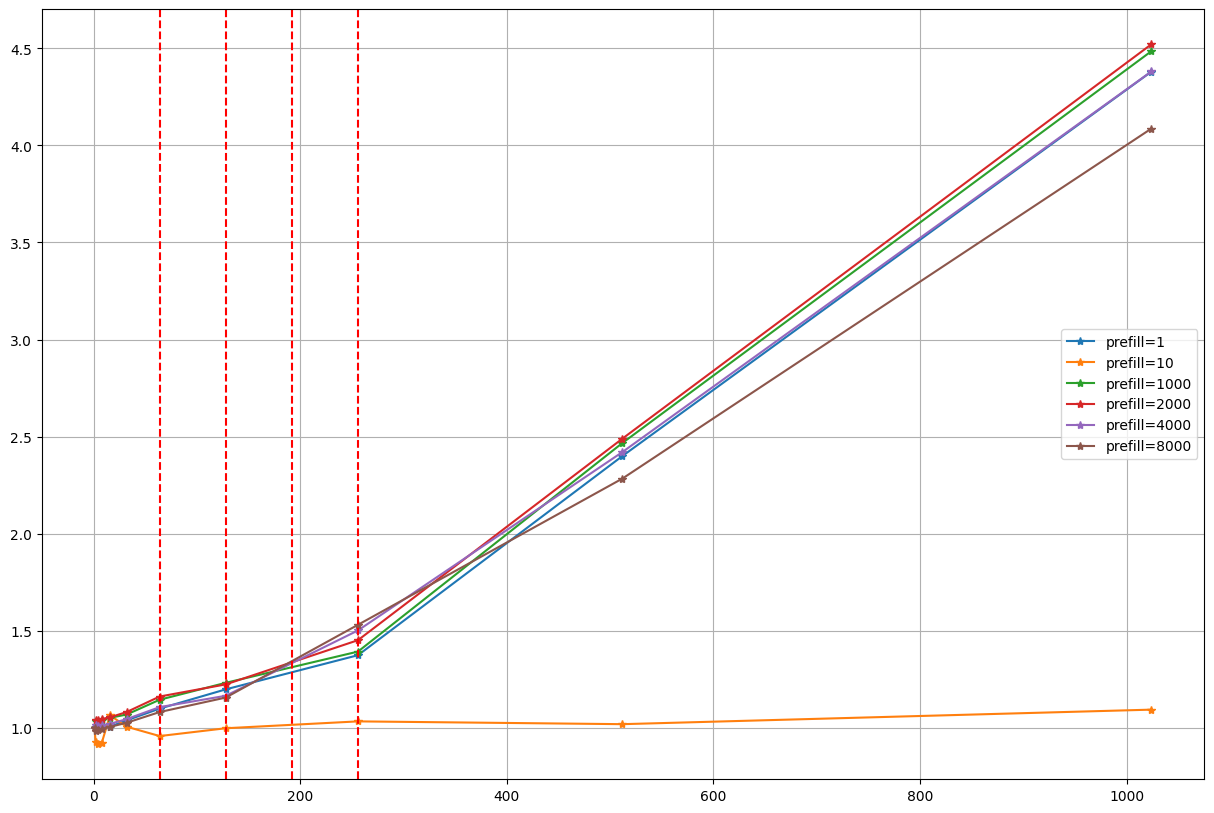

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('report/benchmark_ori.csv')
df = df.sort_values(by=['prefill','input'])

# Preparing data for plotting
x_list_prefill = df['prefill'].unique().tolist()
# inputs = df['input'].unique().tolist()
x_list_input = df['input'].unique().tolist()

# With Flash-Attn (varying 'input')
y_lists_flash = [df[df['input'] == input_value]['latency'].tolist() for input_value in x_list_input]

# With Flash-Attn (varying 'prefill')
y_lists_prefill_flash = [df[df['prefill'] == prefill]['latency'].tolist() for prefill in x_list_prefill]


plt.figure(figsize=(15,10))
plt.grid()
prefill = x_list_prefill
x = x_list_input
k=0
for i in y_lists_prefill_flash:
    # print(len(i),len(x))
    plt.plot(x,[m / i[0] for m in i], label=f'prefill={prefill[k]}', marker='*')
    # plt.plot(x,i, label=f'prefill={prefill[k]}')
    k+=1

# plt.ylim(1)
# draw a vertical line at x = 128
plt.axvline(x=64, color='r', linestyle='--')
plt.axvline(x=128, color='r', linestyle='--')
plt.axvline(x=192, color='r', linestyle='--')
plt.axvline(x=256, color='r', linestyle='--')
plt.legend()
# plt.ylim(0, 10)
# plt.xlim(0, 128)

In [13]:
len(y_lists_prefill_flash[0])

11

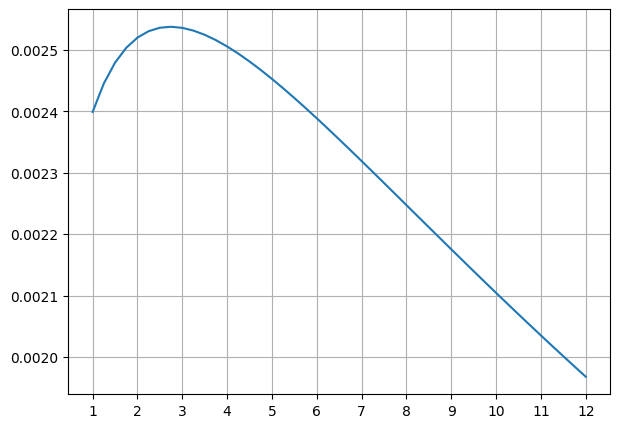

In [22]:
from sympy import symbols, Eq, solve

L = symbols('L')
alpha = 0.91
target = 45.52
draft = 26.13

f = (1-alpha**(L+1))/(draft*L+target)

import numpy as np
x_list = np.arange(1, 12.25, 0.25)
y_list = [f.subs(L, x) for x in x_list]

from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')
# set x-axis step size =1
plt.xticks(np.arange(1, 13, 1))
plt.show()

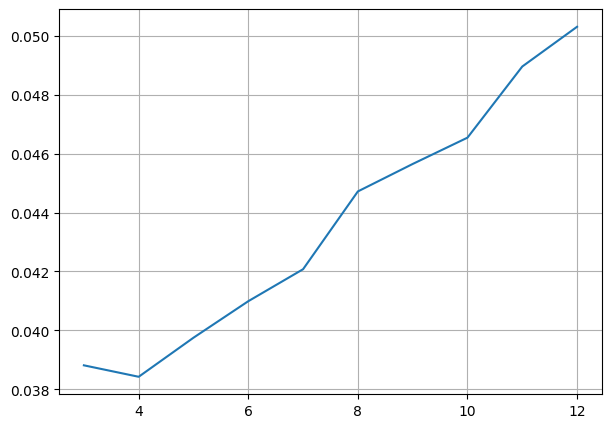

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_32000.csv')
x_list = df['gamma'].unique().tolist()
y_list = []


for gamma in x_list:
    df_g = df[df['gamma'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

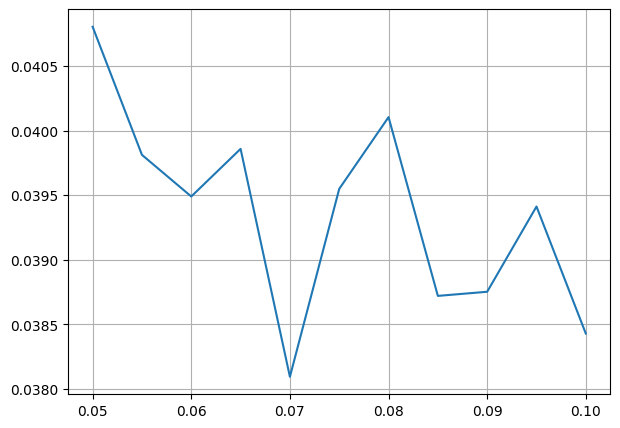

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_32000.csv')
df = df[df['gamma'] == 4]
x_list = sorted(df['budget'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['budget'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

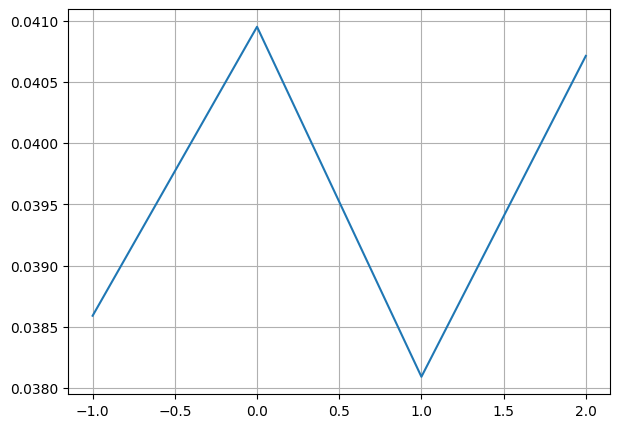

In [67]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_32000.csv')
df = df[df['gamma'] == 4]
df = df[df['budget'] == 0.07]
x_list = sorted(df['ssl'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['ssl'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

In [41]:
y_list

[0.03859189484570473, 0.040950277914871984, 0.038093721028920724]

48K

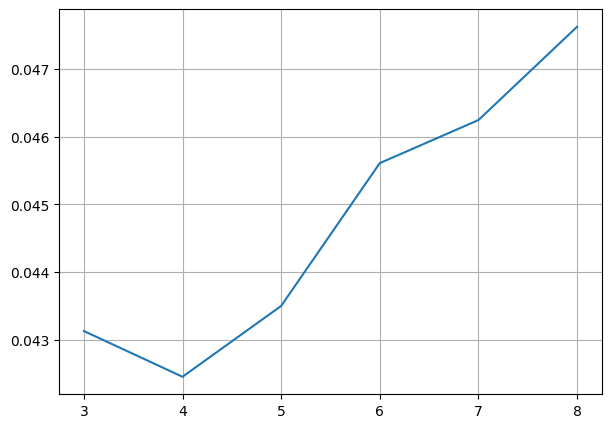

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_48000.csv')
x_list = sorted(df['gamma'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['gamma'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

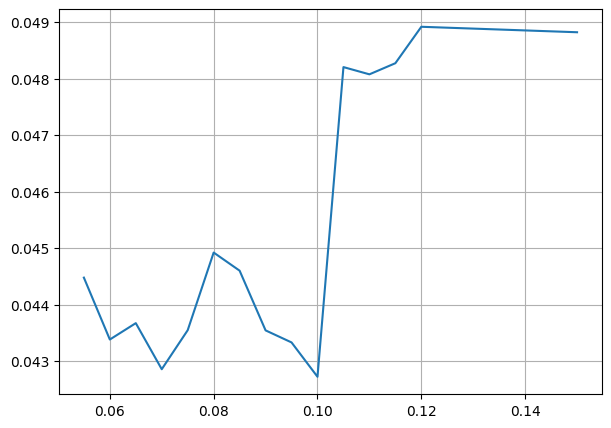

In [72]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_48000.csv')
df = df[df['gamma'] == 4]
x_list = sorted(df['budget'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['budget'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

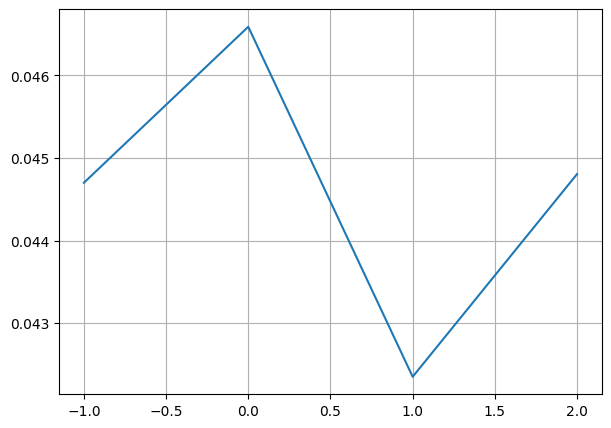

In [71]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_48000.csv')
df = df[df['gamma'] == 4]
df = df[df['budget'] == 0.085]
x_list = sorted(df['ssl'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['ssl'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

56K

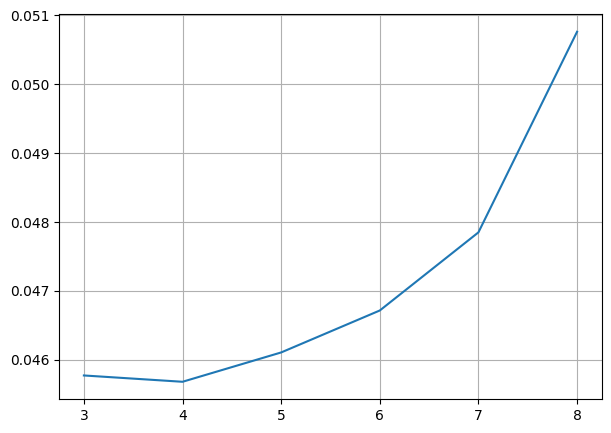

In [78]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_56000.csv')
x_list = sorted(df['gamma'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['gamma'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

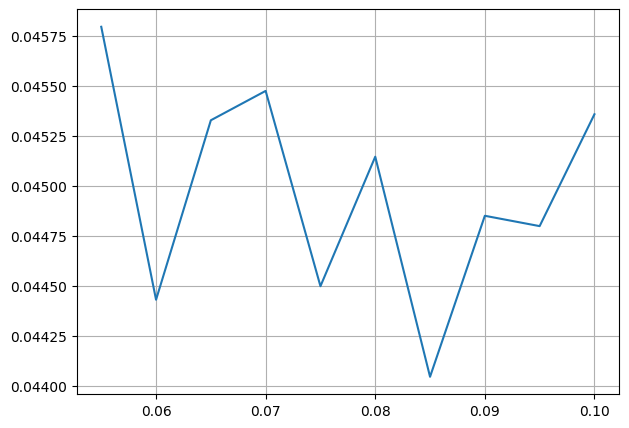

In [90]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_56000.csv')
df = df[df['gamma'] == 4]
x_list = sorted(df['budget'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['budget'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

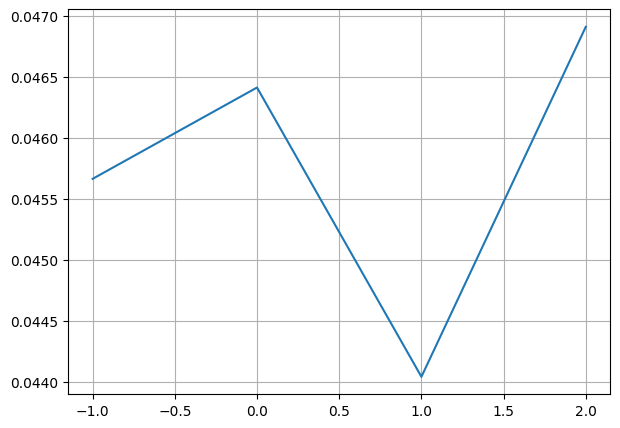

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('report/GS_56000.csv')
df = df[df['gamma'] == 4]
df = df[df['budget'] == 0.085]
x_list = sorted(df['ssl'].unique().tolist())
y_list = []


for gamma in x_list:
    df_g = df[df['ssl'] == gamma]
    y_list.append(df_g['latency'].mean())

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(x_list, y_list, label='f(L)')

In [96]:
y_list

[0.046888964970906534,
 0.04741838145256039,
 0.04404405516547121,
 0.04729222006267966]

64k

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('report/GS_112000.csv')
grouped = df.groupby(['ssl', 'budget', 'gamma']).mean().reset_index()
pivot_table = pd.pivot_table(grouped, values='latency', index='ssl', columns=['budget', 'gamma'], fill_value=0)

pivot_table.replace(0, 999999, inplace=True)
min_idx = pivot_table.values.argmin()
min_row, min_col = divmod(min_idx, len(pivot_table.columns))
min_combination = pivot_table.columns[min_col]
min_value = pivot_table.values.min()
print(f"min: {min_value}")
print(f"combo: {min_combination}")

pivot_table

min: 0.05636467311833352
combo: (0.1, 7)


budget      0.07                                                         \
gamma          3         4         5         6         7              8   
ssl                                                                       
0       0.060043  0.057802  0.059412  0.059415  0.060478  999999.000000   
1       0.061595  0.058105  0.057537  0.057370  0.057507       0.060243   

budget      0.10                                                    
gamma          3         4         5         6         7         8  
ssl                                                                 
0       0.060036  0.058504  0.058254  0.057015  0.059488  0.062274  
1       0.067630  0.058556  0.057834  0.057830  0.056365  0.057903